**Column Description**

1. **Year :** Year of the TB case registration
2. **Quarter :** Quarter of the TB case registration (1-4)
3. **LGA :** Local Government Area where the TB case was registered
4. **Sex :** Male or Female
5. **0-4 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 0-4 years
6. **5-14 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 5-14 years
7. **15–24 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 15-24 years
8. **25–34 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 25-34 years
9. **35–44 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 35-44 years
10. **45–54 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 45-54 years
11. **55–64 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged 55-64 years
12. **>= 65 :** Number of total TB cases (pulmonary + extrapulmonary) for individuals aged >65 years
13. **Total :** Total TB Cases (Aggregated)




In [ ]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# import data
block2c_2023 = pd.read_csv('/content/Block2c_2023.csv')
# remove index column
block2c_2023

,Year,Quarter,LGA,Sex,0-4,5-14,15–24,25–34,35–44,45–54,55–64,> 65,Total
0,2023,1,Birin Gwari,Male,0,5,10,15,5,6,15,11,67
1,2023,1,Birin Gwari,Female,0,1,2,14,8,10,9,13,57
2,2023,2,Birin Gwari,Male,1,3,3,6,12,16,11,4,56
3,2023,2,Birin Gwari,Female,0,5,7,12,17,21,14,8,84
4,2023,3,Birin Gwari,Male,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
179,2023,2,Zaria,Female,11,17,120,88,29,60,24,20,369
180,2023,3,Zaria,Male,0,0,0,0,0,0,0,0,0
181,2023,3,Zaria,Female,0,0,0,0,0,0,0,0,0
182,2023,4,Zaria,Male,0,0,0,0,0,0,0,0,0


In [ ]:
block2c_2023.head()

,Year,Quarter,LGA,Sex,0-4,5-14,15–24,25–34,35–44,45–54,55–64,> 65,Total
0,2023,1,Birin Gwari,Male,0,5,10,15,5,6,15,11,67
1,2023,1,Birin Gwari,Female,0,1,2,14,8,10,9,13,57
2,2023,2,Birin Gwari,Male,1,3,3,6,12,16,11,4,56
3,2023,2,Birin Gwari,Female,0,5,7,12,17,21,14,8,84
4,2023,3,Birin Gwari,Male,0,0,0,0,0,0,0,0,0


In [ ]:
block2c_2023.shape

(184, 13)

In [ ]:
block2c_2023.columns

Index(['Year', 'Quarter', 'LGA', 'Sex', '0-4', '5-14', '15–24', '25–34',
       '35–44', '45–54', '55–64', '> 65', 'Total'],
      dtype='object')

In [ ]:
block2c_2023.rename(columns={'> 65':'>=65'},inplace=True)

In [ ]:
block2c_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Year     184 non-null    int64 
 1   Quarter  184 non-null    int64 
 2   LGA      184 non-null    object
 3   Sex      184 non-null    object
 4   0-4      184 non-null    int64 
 5   5-14     184 non-null    int64 
 6   15–24    184 non-null    int64 
 7   25–34    184 non-null    int64 
 8   35–44    184 non-null    int64 
 9   45–54    184 non-null    int64 
 10  55–64    184 non-null    int64 
 11  >=65     184 non-null    int64 
 12  Total    184 non-null    int64 
dtypes: int64(11), object(2)
memory usage: 18.8+ KB


### Handling Null Values

In [ ]:
# check for null values
block2c_2023.isnull().sum()

Year       0
Quarter    0
LGA        0
Sex        0
0-4        0
5-14       0
15–24      0
25–34      0
35–44      0
45–54      0
55–64      0
>=65       0
Total      0
dtype: int64

### Outliers

In [ ]:
block2c_2023.describe()

,Year,Quarter,0-4,5-14,15–24,25–34,35–44,45–54,55–64,>=65,Total
count,184.0,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000,184.000000
mean,2023.0,2.500000,2.266304,5.108696,12.978261,18.358696,16.217391,11.135870,6.076087,3.271739,75.413043
std,0.0,1.121085,6.672655,18.188423,26.204316,31.496233,25.110608,19.026528,11.506932,7.663130,120.032569
min,2023.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2023.0,1.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2023.0,2.500000,0.000000,0.000000,0.000000,1.500000,0.500000,0.000000,0.000000,0.000000,7.000000
75%,2023.0,3.250000,1.000000,4.000000,11.500000,21.250000,24.750000,15.250000,8.000000,4.000000,107.250000
max,2023.0,4.000000,50.000000,215.000000,201.000000,165.000000,134.000000,109.000000,61.000000,53.000000,533.000000


In [ ]:
num_cols = ['0-4','5-14','15–24','25–34','35–44','45–54','55–64','>=65']

In [ ]:
# we will only work with upper boundary as min values seems correct
def find_upper_boundary(col):

  Q1 = np.percentile(block2c_2023[col], 25, method='midpoint')
  Q3 = np.percentile(block2c_2023[col], 75, method='midpoint')
  IQR = Q3 - Q1

  upper_boundary = Q3 + IQR*1.5

  return upper_boundary


In [ ]:
# locate outliers
block2c_2023.loc[
    (block2c_2023['0-4']> find_upper_boundary('0-4')) |
    (block2c_2023['5-14']> find_upper_boundary('5-14')) |
    (block2c_2023['15–24']>find_upper_boundary('15–24')) |
    (block2c_2023['25–34']>find_upper_boundary('25–34')) |
    (block2c_2023['35–44']>find_upper_boundary('35–44')) |
    (block2c_2023['45–54']>find_upper_boundary('45–54')) |
    (block2c_2023['55–64']>find_upper_boundary('55–64')) |
    (block2c_2023['>=65']>find_upper_boundary('>=65'))
]

,Year,Quarter,LGA,Sex,0-4,5-14,15–24,25–34,35–44,45–54,55–64,>=65,Total
0,2023,1,Birni – Gwari,Male,0,5,10,15,5,6,15,11,67
1,2023,1,Birni – Gwari,Female,0,1,2,14,8,10,9,13,57
8,2023,1,Chikun,Male,0,0,19,70,84,40,20,4,237
10,2023,2,Chikun,Male,7,5,49,105,93,43,14,9,325
11,2023,2,Chikun,Female,3,4,29,53,41,22,7,9,168
16,2023,1,Giwa,Male,5,27,61,123,70,17,1,3,307
17,2023,1,Giwa,Female,3,34,84,83,40,9,3,0,256
18,2023,2,Giwa,Male,3,34,56,81,67,21,2,2,266
19,2023,2,Giwa,Female,5,30,80,75,43,11,1,2,247
26,2023,2,Igabi,Male,3,5,27,34,32,29,19,4,153


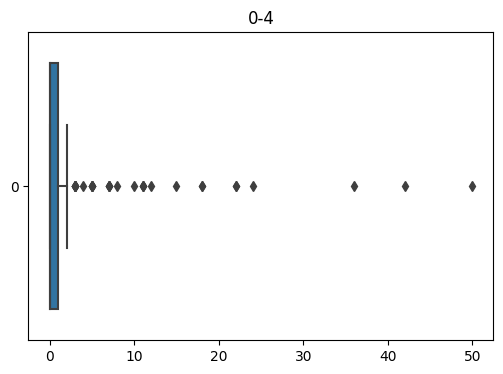

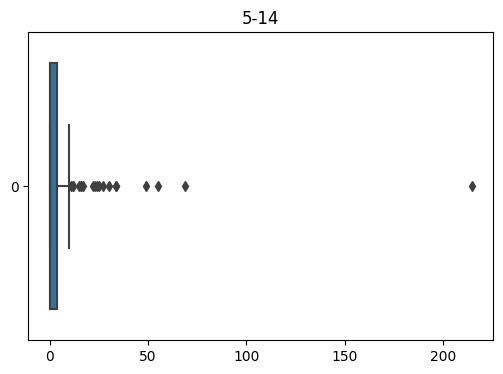

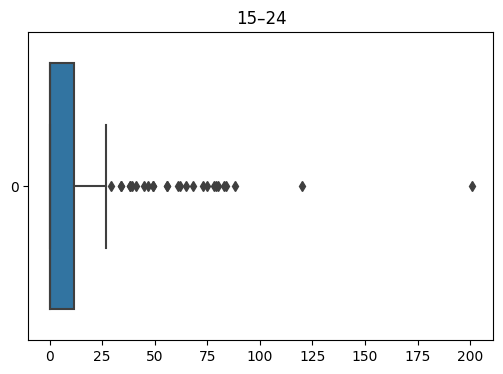

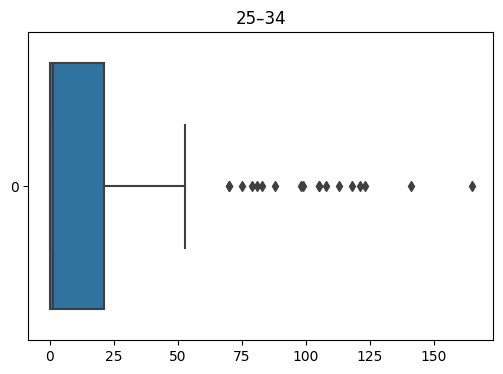

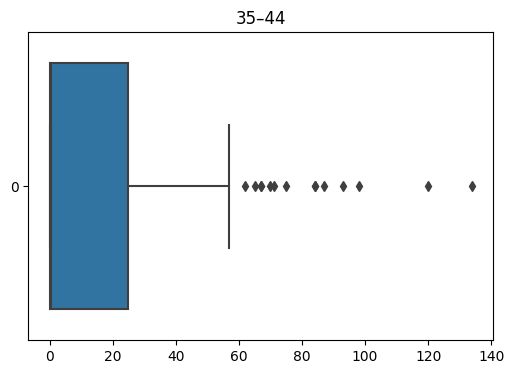

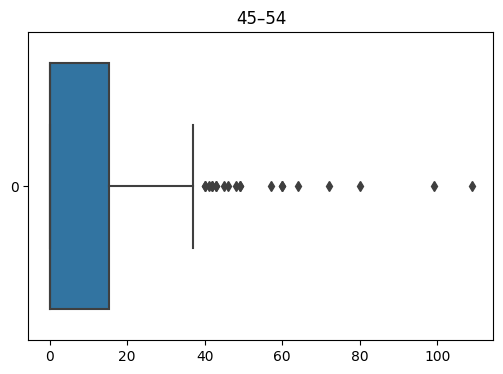

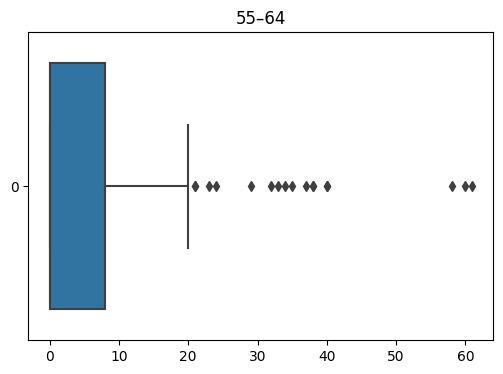

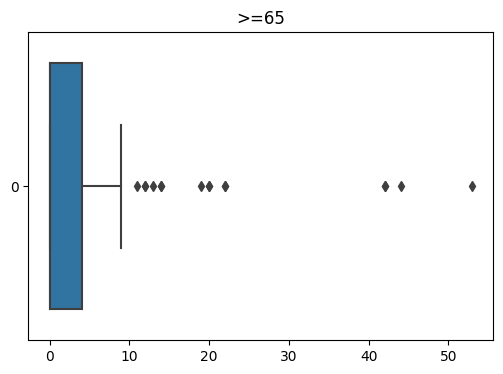

In [ ]:
for col in num_cols:
  fig = plt.figure(figsize=(6,4))
  sns.boxplot(block2c_2023[col],orient="h")
  plt.title(col)

In [ ]:
original_lgas_list = [
    "Birni – Gwari", "Chikun", "Giwa", "Igabi", "Ikara", "Jaba", "Jema'a",
    "Kachia", "Kaduna North", "Kaduna South", "Kagarko", "Kajuru", "Kaura",
    "Kauru", "Kubau", "Kudan", "Lere", "Makarfi", "Sabon – Gari", "Sanga",
    "Soba", "Zangon – Kataf", "Zaria"
]

In [ ]:
lgas_list = list(pd.unique(block2c_2023['LGA']))
lgas_list

['Birni – Gwari',
 'Chikun',
 'Giwa',
 'Igabi',
 'Ikara',
 'Jaba',
 "Jema'a",
 'Kachia',
 'Kaduna North',
 'Kaduna South',
 'Kagarko',
 'Kajuru',
 'Kaura',
 'Kauru',
 'Kubau',
 'Kudan',
 'Lere',
 'Makarfi',
 'Sabon – Gari',
 'Sanga',
 'Soba',
 'Zangon – Kataf',
 'Zaria']

In [ ]:
block2c_2023['LGA'] = block2c_2023['LGA'].apply(lambda x: original_lgas_list[lgas_list.index(x)])

### Data Flattening

Data is flattened with age columns for ease of analysis.

Total column is removed as it can be calculated by aggregation.

The new columns created are Age_Gr and TB_Cases.

In [ ]:
block2c_2023_flattened = pd.melt(
                                  block2c_2023,
                                  id_vars=['Year','Quarter','LGA','Sex'],
                                  value_vars=['0-4','5-14','15–24','25–34','35–44','45–54','55–64','>=65'],
                                  var_name = 'Age_Gr',
                                  value_name = 'TB_Cases'
                                )

In [ ]:
block2c_2023_flattened

,Year,Quarter,LGA,Sex,Age_Gr,TB_Cases
0,2023,1,Birni – Gwari,Male,0-4,0
1,2023,1,Birni – Gwari,Female,0-4,0
2,2023,2,Birni – Gwari,Male,0-4,1
3,2023,2,Birni – Gwari,Female,0-4,0
4,2023,3,Birni – Gwari,Male,0-4,0
...,...,...,...,...,...,...
1467,2023,2,Zaria,Female,>=65,20
1468,2023,3,Zaria,Male,>=65,0
1469,2023,3,Zaria,Female,>=65,0
1470,2023,4,Zaria,Male,>=65,0


## UNIVARIATE ANALYSIS

### Year

In [ ]:
block2c_2023_flattened['Year'].nunique()

1

In [ ]:
block2c_2023_flattened['Year'].value_counts()

2023    1472
Name: Year, dtype: int64

We have one year data of year 2023

### Quarter

In [ ]:
block2c_2023_flattened['Quarter'].nunique()

4

In [ ]:
block2c_2023_flattened['Quarter'].value_counts()

1    368
2    368
3    368
4    368
Name: Quarter, dtype: int64

The year is can be divided into four quarters.

### LGA

In [ ]:
block2c_2023_flattened['LGA'].nunique()

23

In [ ]:
block2c_2023_flattened['LGA'].value_counts()

Birni – Gwari     64
Kaura             64
Zangon – Kataf    64
Soba              64
Sanga             64
Sabon – Gari      64
Makarfi           64
Lere              64
Kudan             64
Kubau             64
Kauru             64
Kajuru            64
Chikun            64
Kagarko           64
Kaduna South      64
Kaduna North      64
Kachia            64
Jema'a            64
Jaba              64
Ikara             64
Igabi             64
Giwa              64
Zaria             64
Name: LGA, dtype: int64

The Katuna state have 23 Local Government Authorities (LGA).

### Age_Gr

In [ ]:
block2c_2023_flattened['Age_Gr'].nunique()

8

In [ ]:
block2c_2023_flattened['Age_Gr'].value_counts()

0-4      184
5-14     184
15–24    184
25–34    184
35–44    184
45–54    184
55–64    184
>=65     184
Name: Age_Gr, dtype: int64

we have equal samples of 8 different Age groups.

### TB_Cases

<Axes: xlabel='TB_Cases', ylabel='Count'>

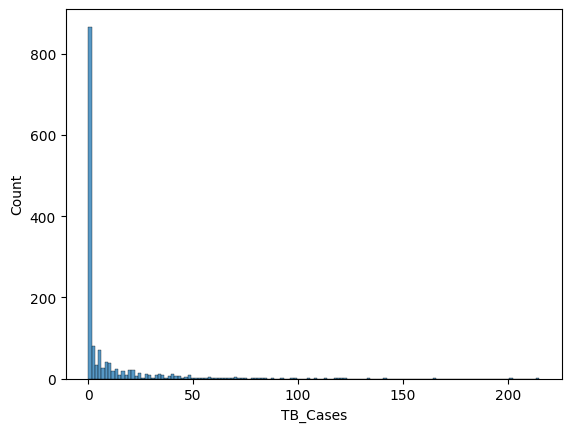

In [ ]:
sns.histplot(block2c_2023_flattened['TB_Cases'])

The graph is left skewed with case counts below 10 for most of the time.

## Bivariate_analysis

### Year-wise TB Cases

In [ ]:
Yearwise_TB_Cases = block2c_2023_flattened.groupby(['Year'])['TB_Cases'].sum().reset_index()

In [ ]:
Yearwise_TB_Cases.head()

,Year,TB_Cases
0,2023,13876


we have total of nearly 13.9K cases for year 2023 for block 2C.

### Quarter-wise TB Cases

In [ ]:
Quarterwise_TB_Cases = block2c_2023_flattened.groupby(['Quarter'])['TB_Cases'].sum().reset_index()

In [ ]:
Quarterwise_TB_Cases.head()

,Quarter,TB_Cases
0,1,6655
1,2,7221
2,3,0
3,4,0


([<matplotlib.axis.XTick at 0x7fa8e78d7b80>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

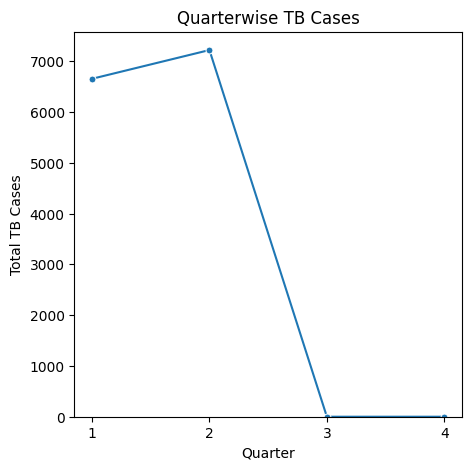

In [ ]:
fig = plt.figure(figsize=(5,5))

g = sns.lineplot(
    data = Quarterwise_TB_Cases,
    x = 'Quarter',
    y = 'TB_Cases',
    marker = 'o',
    markersize = 5
)

g.set_ylim(bottom=0)
plt.title('Quarterwise TB Cases')
plt.xlabel('Quarter')
plt.ylabel('Total TB Cases')
plt.xticks([1,2,3,4],[1,2,3,4])

TB Cases increased in first quarter but after that no TB Cases are detected for 3rd and 4th quarter.

### LGA-wise TB Cases

In [ ]:
LGAwise_TB_Cases = block2c_2023_flattened.groupby('LGA')['TB_Cases'].sum().reset_index()

In [ ]:
LGAwise_TB_Cases.head()

,LGA,TB_Cases
0,Birni – Gwari,264
1,Chikun,836
2,Giwa,1076
3,Igabi,517
4,Ikara,198


(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000')])

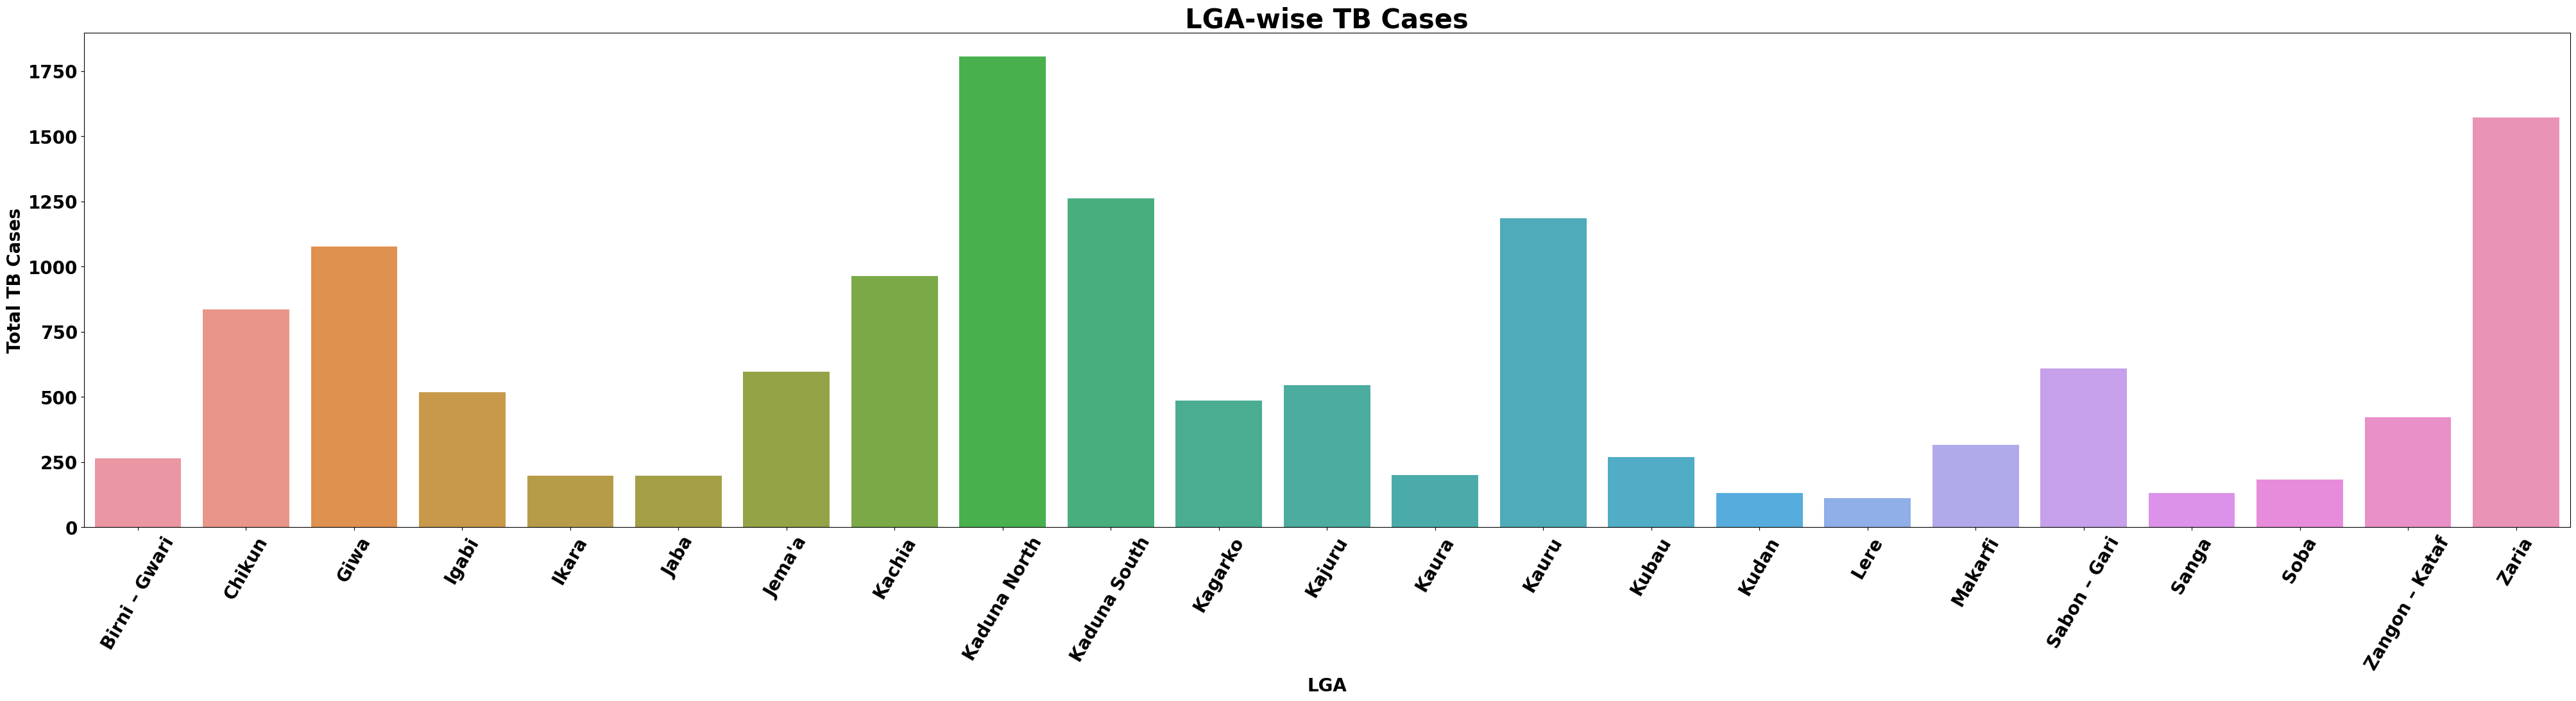

In [ ]:
fig = plt.figure(figsize=(50,10))

sns.barplot(
    data = LGAwise_TB_Cases,
    x = 'LGA',
    y = 'TB_Cases'
)

plt.title('LGA-wise TB Cases',fontsize= 30,fontweight='bold')
plt.xlabel('LGA',fontsize= 20,fontweight='bold')
plt.ylabel('Total TB Cases',fontsize= 20,fontweight='bold')
plt.xticks(fontsize= 20,fontweight='bold',rotation=60)
plt.yticks(fontsize= 20,fontweight='bold')

Kaduna North, Zaria and Kaduna are TOP 3 LGAs in terms of cases registered.

Lere,Kudan and Sanga are Bottom 3 LGAs in terms of cases registered.

### Age_Gr wise TB Cases

In [ ]:
AgeGrwise_TB_Cases = block2c_2023_flattened.groupby('Age_Gr')['TB_Cases'].sum().reset_index()

In [ ]:
AgeGrwise_TB_Cases

,Age_Gr,TB_Cases
0,0-4,417
1,15–24,2388
2,25–34,3378
3,35–44,2984
4,45–54,2049
5,5-14,940
6,55–64,1118
7,>=65,602


Text(0, 0.5, 'Age Gr')

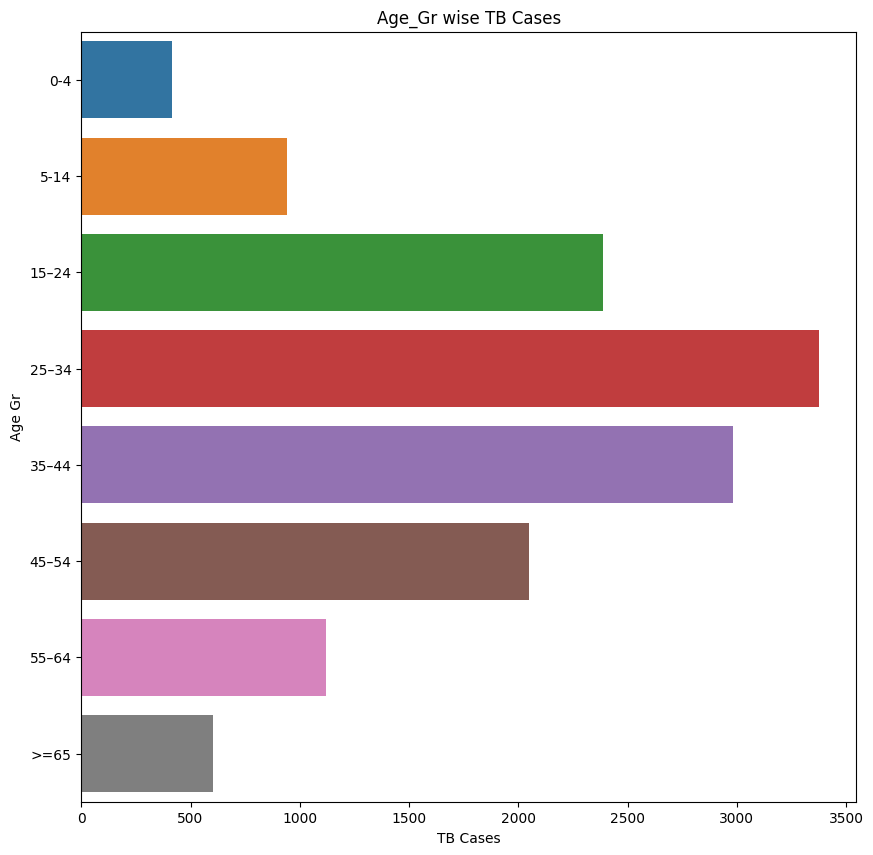

In [ ]:
plt.figure(figsize = (10,10))

sns.barplot(
    data = AgeGrwise_TB_Cases,
    x = 'TB_Cases',
    y = 'Age_Gr',
    orient = "h",
    order = ['0-4','5-14','15–24','25–34','35–44','45–54','55–64','>=65']
)

plt.title('Age_Gr wise TB Cases')
plt.xlabel('TB Cases')
plt.ylabel('Age Gr')

Age gr. 25-34 and 35-44 have most TB Cases.

## Multivariate Analysis

### Quarterwise trend of TB Cases In LGA

In [ ]:
Quarterwise_Trend_Over_LGA = block2c_2023_flattened.groupby(['LGA','Quarter'])['TB_Cases'].sum().reset_index()

In [ ]:
Quarterwise_Trend_Over_LGA

,LGA,Quarter,TB_Cases
0,Birni – Gwari,1,124
1,Birni – Gwari,2,140
2,Birni – Gwari,3,0
3,Birni – Gwari,4,0
4,Chikun,1,343
...,...,...,...
87,Zangon – Kataf,4,0
88,Zaria,1,767
89,Zaria,2,805
90,Zaria,3,0


In [ ]:
LGAs = list(pd.unique(Quarterwise_Trend_Over_LGA['LGA']))

Text(0.5, 0.98, 'Quarterwise trend of TB Cases In Each LGA')

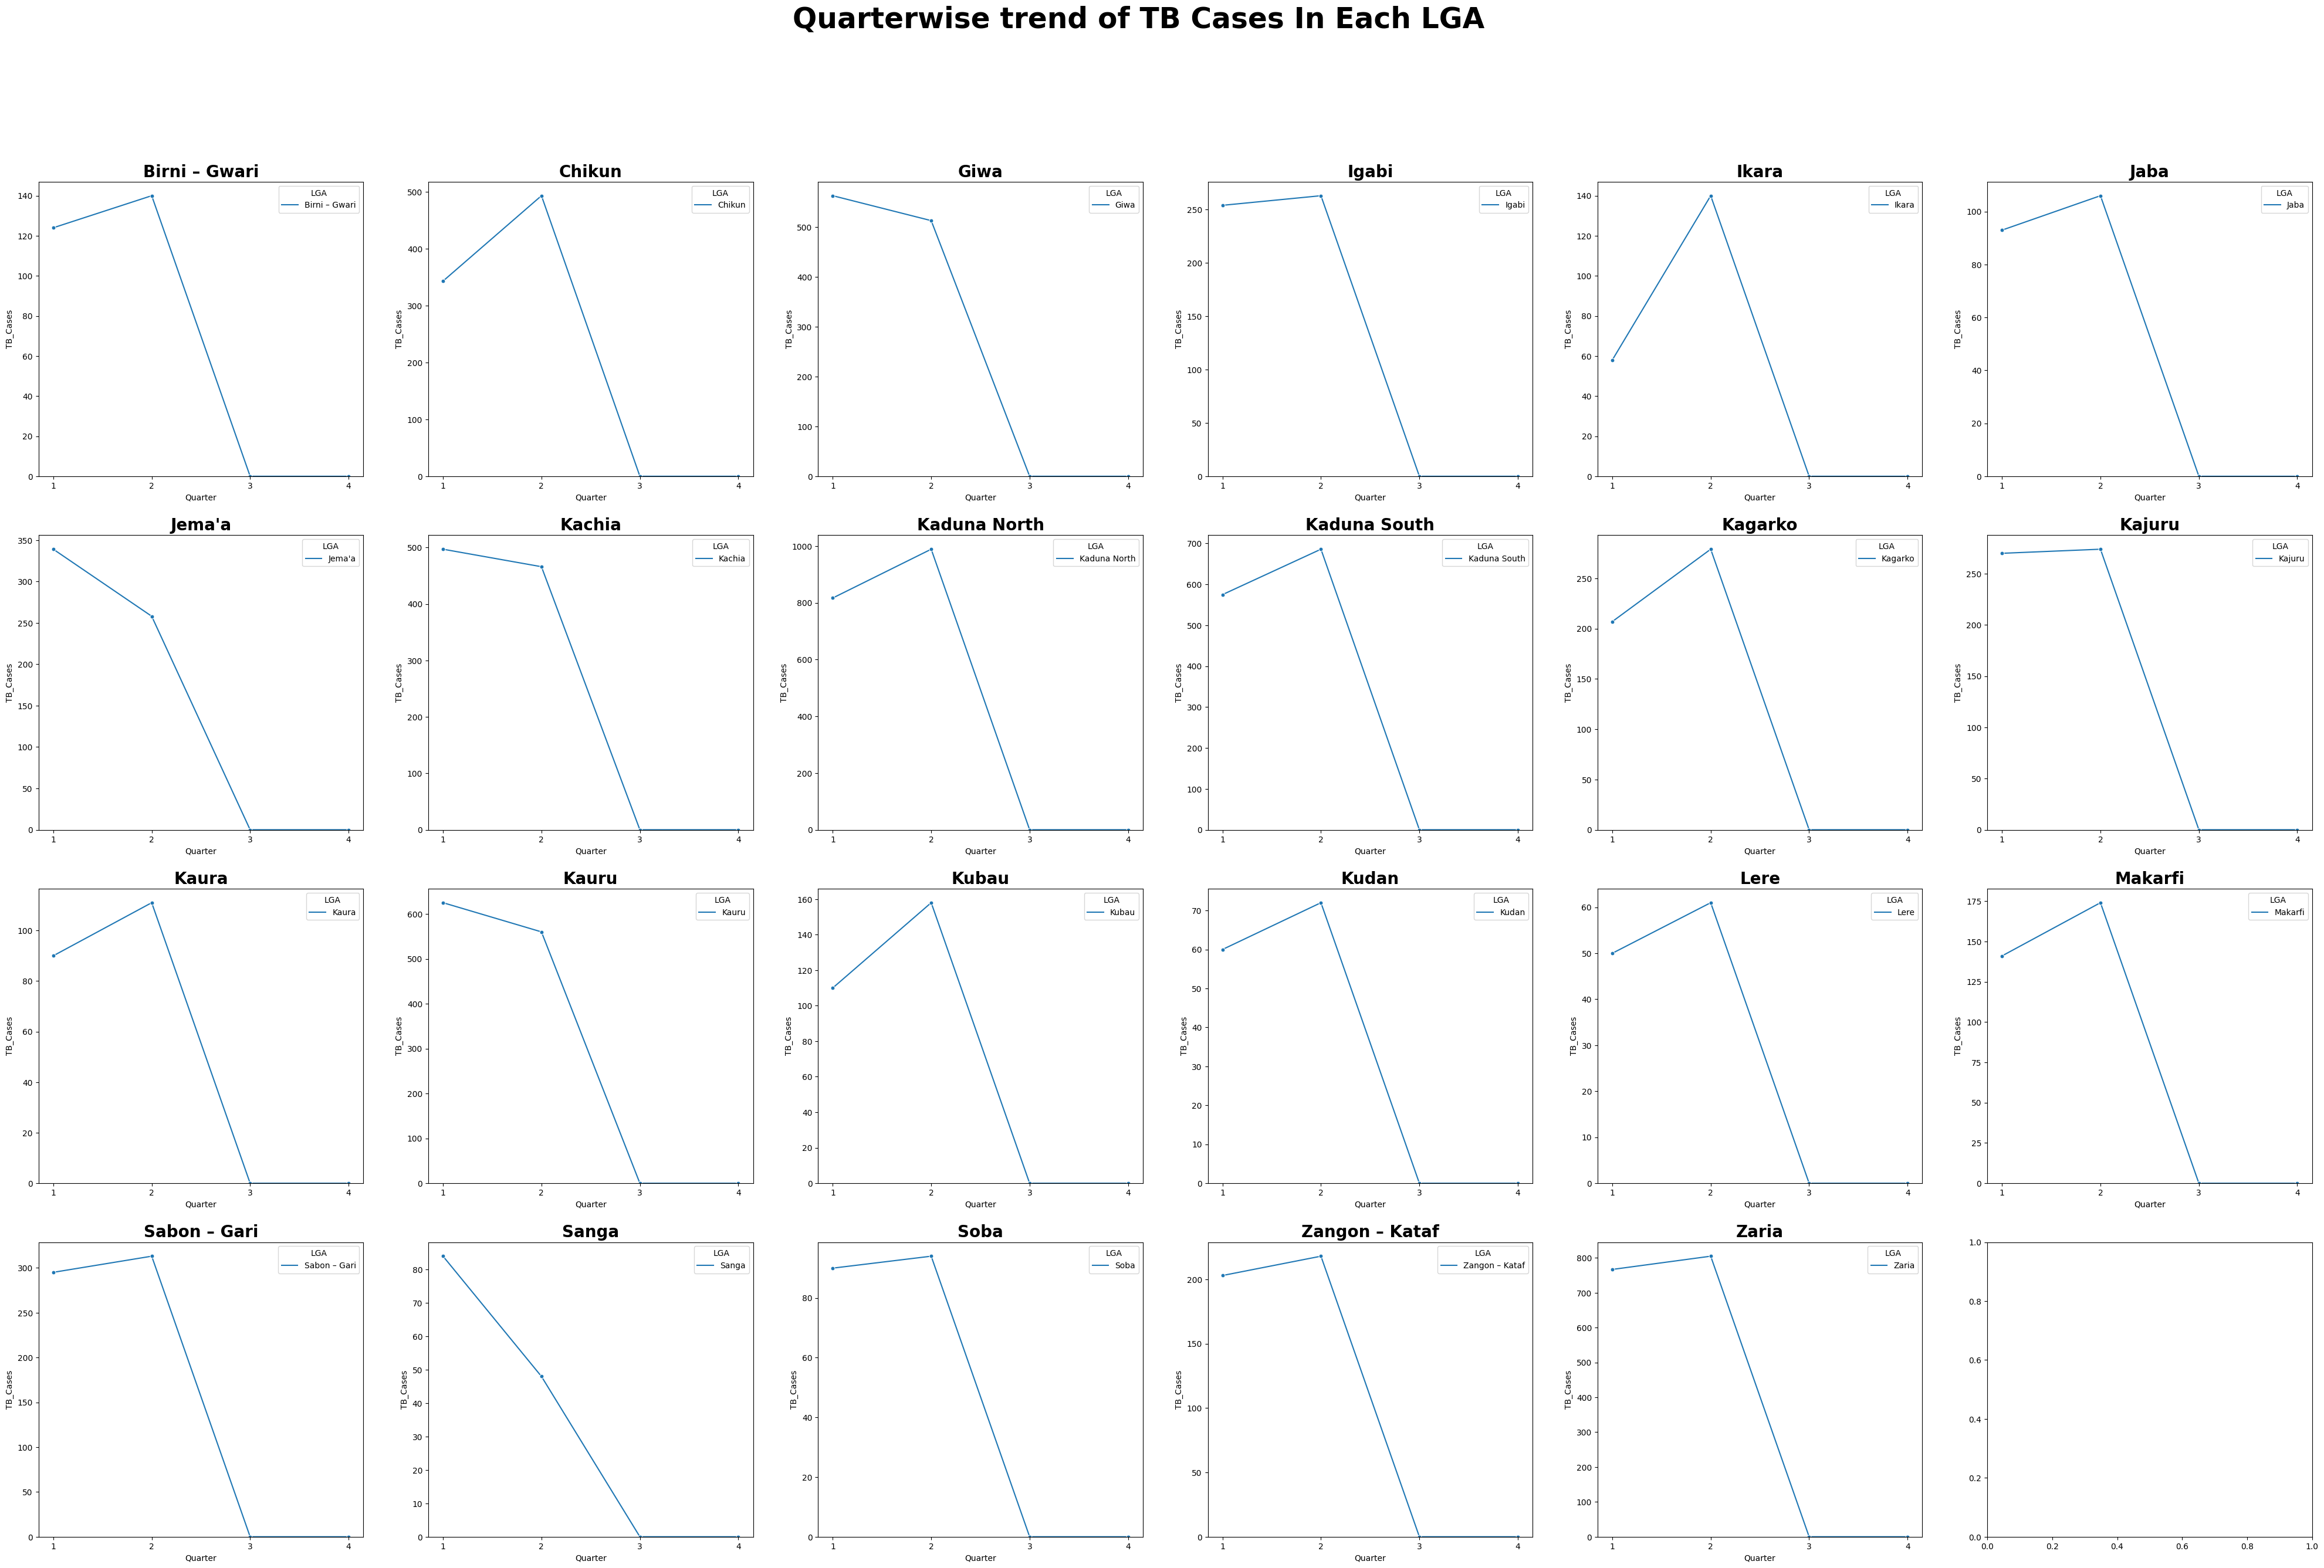

In [ ]:
fig,axes = plt.subplots(4,6,figsize=(50,30))

i=0
j=0

for lga in LGAs:
  sns.lineplot(
      ax = axes[i,j],
      data = Quarterwise_Trend_Over_LGA.loc[Quarterwise_Trend_Over_LGA['LGA']==lga],
      x = 'Quarter',
      y = 'TB_Cases',
      hue = 'LGA',
      marker = 'o',
      markersize=5
  )
  axes[i,j].set_title(lga, fontsize=20, fontweight='bold')
  axes[i,j].set_xticks([1,2,3,4],[1,2,3,4])
  axes[i,j].set_ylim(bottom=0)
  j = j+1
  if j==6:
    i = i+1
    j=0

plt.suptitle('Quarterwise trend of TB Cases In Each LGA', fontsize=35, fontweight='bold')


### Quarterwise Trend Of TB Cases For Each Age Group

In [ ]:
Quarterwise_Trend_Over_Age = block2c_2023_flattened.groupby(['Quarter','Age_Gr'])['TB_Cases'].sum().reset_index()

In [ ]:
Quarterwise_Trend_Over_Age

,Quarter,Age_Gr,TB_Cases
0,1,0-4,198
1,1,15–24,1047
2,1,25–34,1660
3,1,35–44,1475
4,1,45–54,1016
5,1,5-14,371
6,1,55–64,572
7,1,>=65,316
8,2,0-4,219
9,2,15–24,1341


([<matplotlib.axis.XTick at 0x7fa8e0b03550>,
 [Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3'), Text(4, 0, '4')])

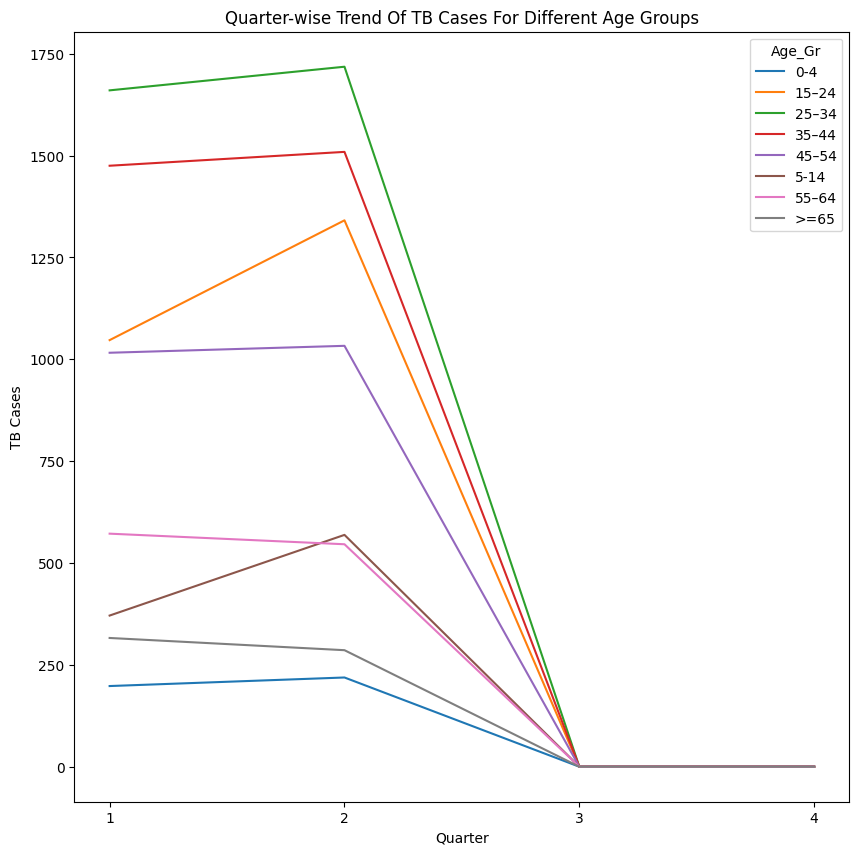

In [ ]:
plt.figure(figsize = (10,10))

sns.lineplot(
    data = Quarterwise_Trend_Over_Age,
    x = 'Quarter',
    y = 'TB_Cases',
    hue = 'Age_Gr'
)

plt.title('Quarter-wise Trend Of TB Cases For Different Age Groups')
plt.xlabel('Quarter')
plt.ylabel('TB Cases')
plt.xticks([1,2,3,4],[1,2,3,4])

For age_gr 55-64,>=65 TB Cases were higher in Q1 than Q2
while for others cases increased in Q2. But from Q3 no cases were detected.

### TB Cases for different Age Groups In Each LGA

In [ ]:
Agewise_TB_Cases_For_LGA = block2c_2023_flattened.groupby(['LGA','Age_Gr'])['TB_Cases'].sum().reset_index()

In [ ]:
Agewise_TB_Cases_For_LGA

,LGA,Age_Gr,TB_Cases
0,Birni – Gwari,0-4,1
1,Birni – Gwari,15–24,22
2,Birni – Gwari,25–34,47
3,Birni – Gwari,35–44,42
4,Birni – Gwari,45–54,53
...,...,...,...
179,Zaria,35–44,264
180,Zaria,45–54,225
181,Zaria,5-14,61
182,Zaria,55–64,123


In [ ]:
LGAs = list(pd.unique(Agewise_TB_Cases_For_LGA['LGA']))
LGAs

['Birni – Gwari',
 'Chikun',
 'Giwa',
 'Igabi',
 'Ikara',
 'Jaba',
 "Jema'a",
 'Kachia',
 'Kaduna North',
 'Kaduna South',
 'Kagarko',
 'Kajuru',
 'Kaura',
 'Kauru',
 'Kubau',
 'Kudan',
 'Lere',
 'Makarfi',
 'Sabon – Gari',
 'Sanga',
 'Soba',
 'Zangon – Kataf',
 'Zaria']

Text(0.5, 0.98, 'Agewise TB Cases For Each LGA')

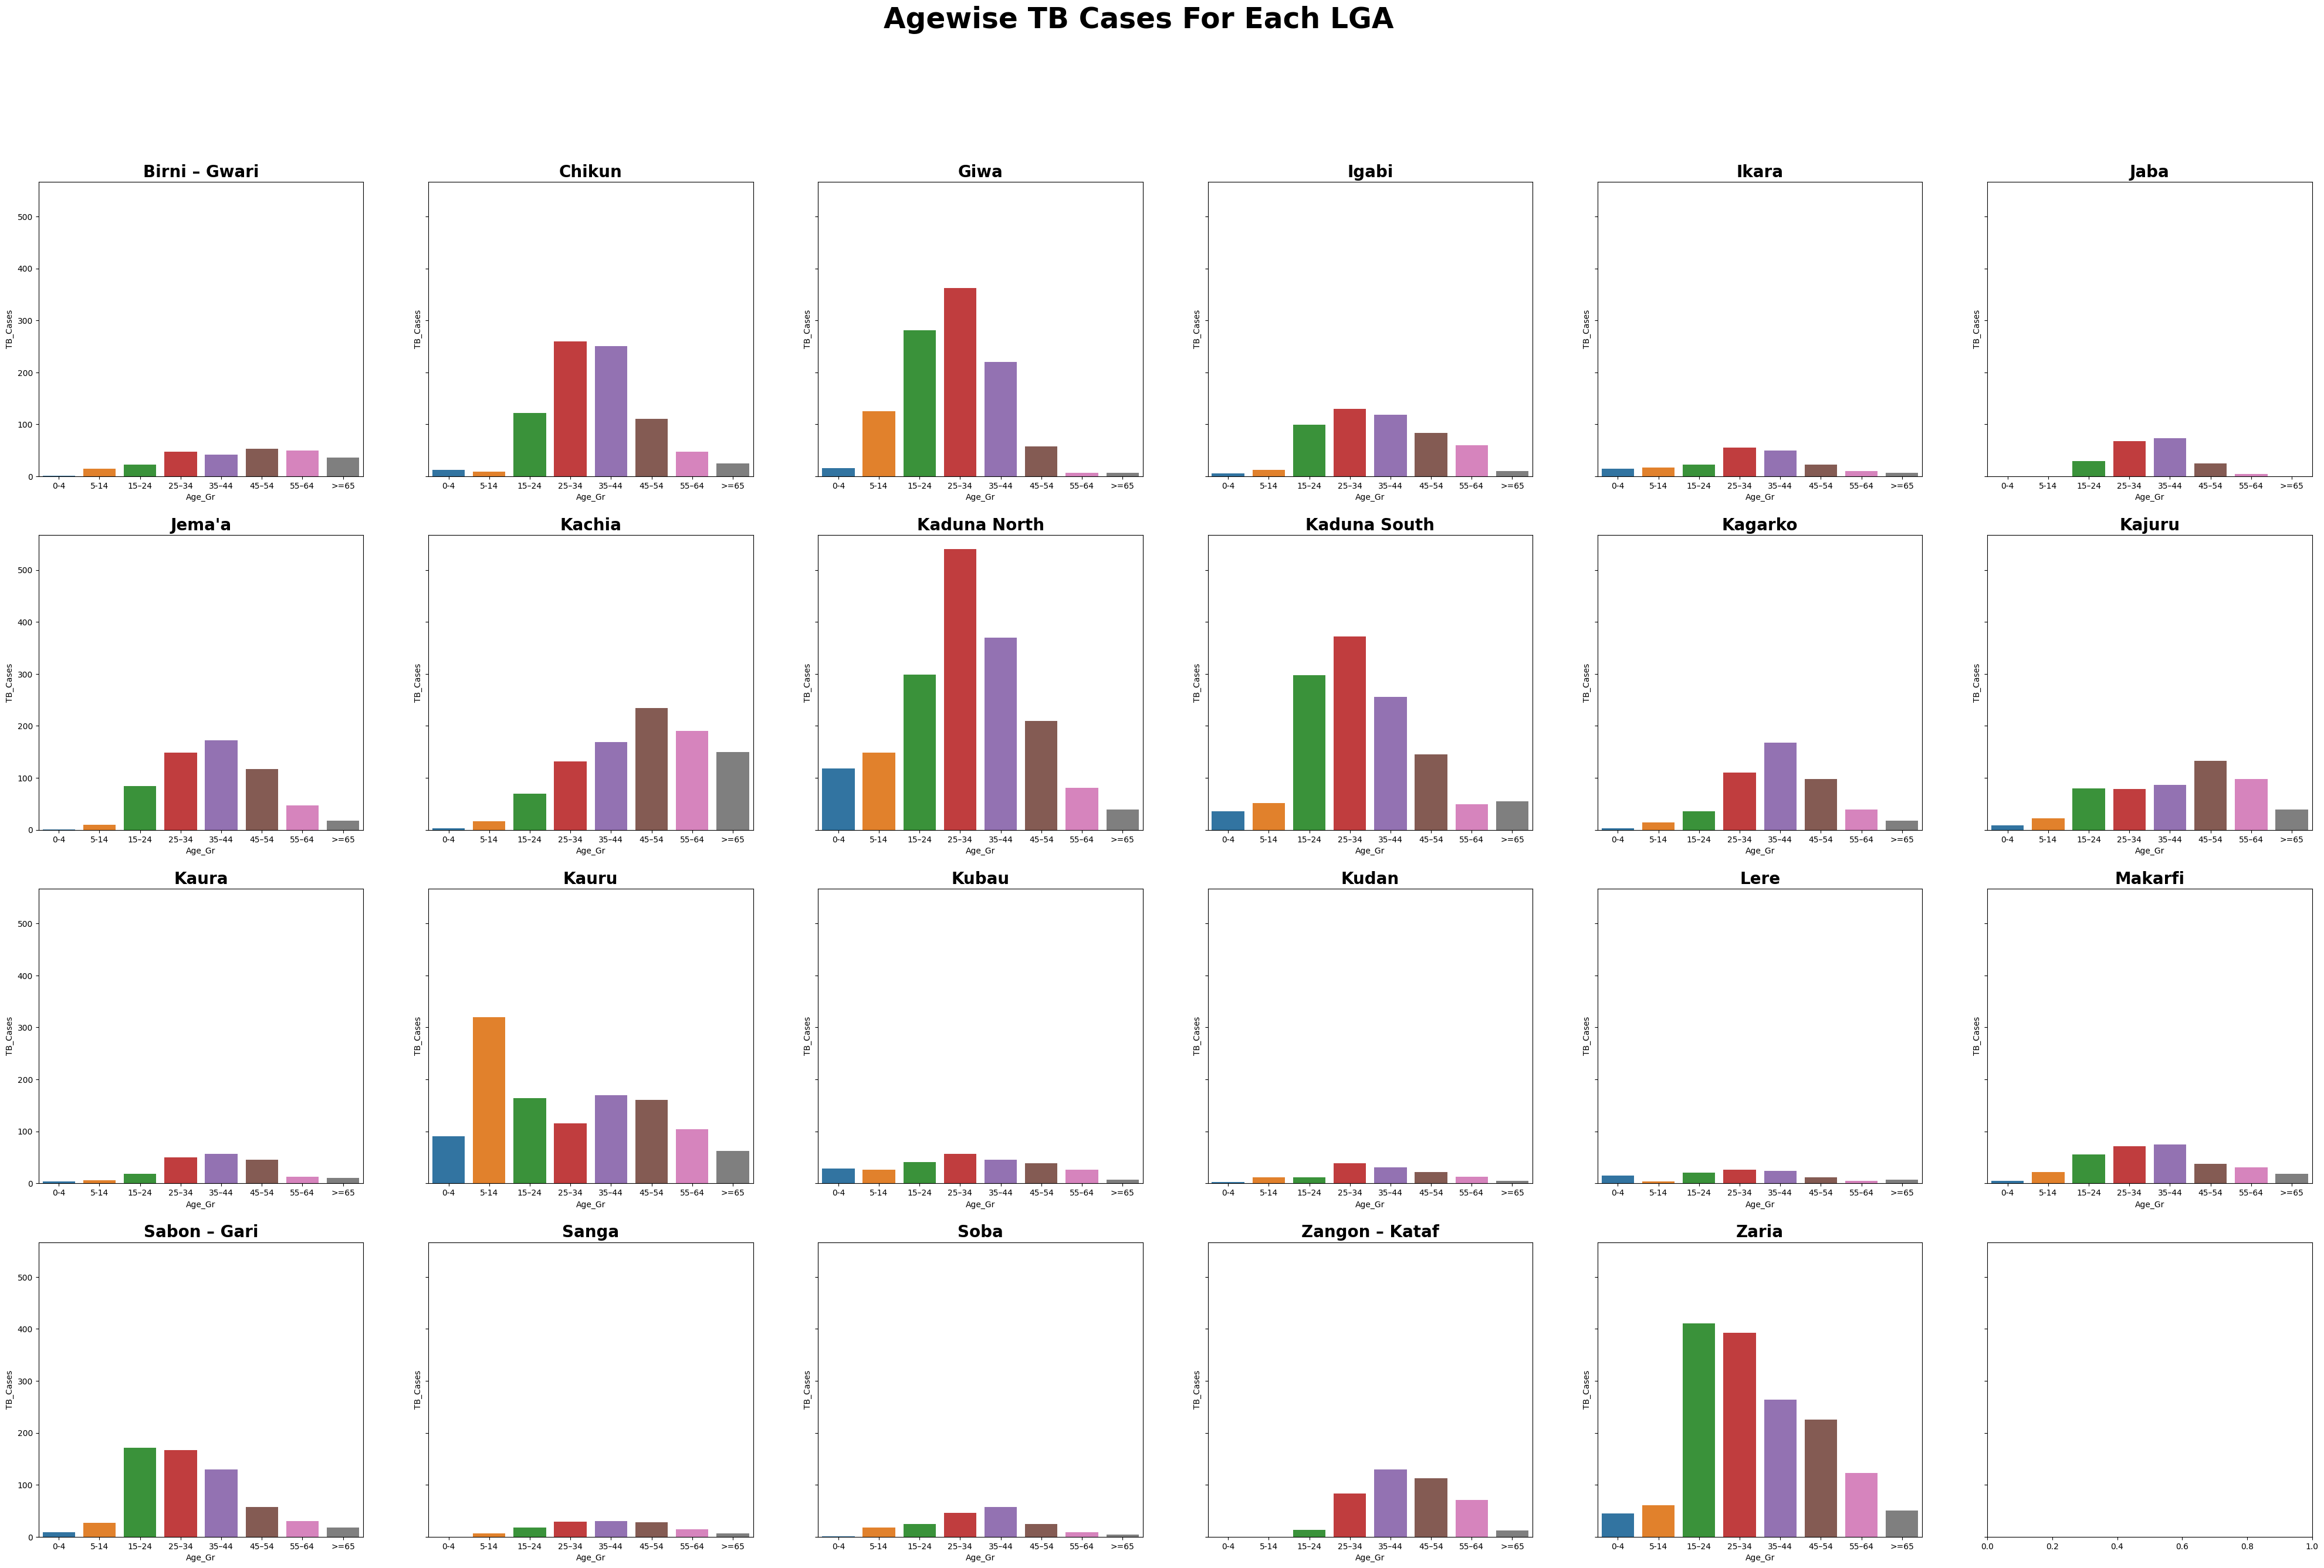

In [ ]:
fig, axes = plt.subplots(4, 6, figsize=(50,30),sharey=True)
i=0
j=0
for lga in LGAs:
  sns.barplot(
      ax = axes[i,j],
      data = Agewise_TB_Cases_For_LGA.loc[Agewise_TB_Cases_For_LGA['LGA'] == lga],
      x = 'Age_Gr',
      y = 'TB_Cases',
      order = ['0-4','5-14','15–24','25–34','35–44','45–54','55–64','>=65'],
      # hue_order = ['Blue','Orange','Green','Red','Purple','Brown','Pink','Sky Blue']
  )
  axes[i,j].set_title(lga, fontsize=20, fontweight='bold')
  j = j+1
  if j == 6:
    i = i+1
    j=0

fig.suptitle('Agewise TB Cases For Each LGA', fontsize=35, fontweight='bold')